# INTRODUCTION

Medical malpractice as defined by Miriam Merriam-Webster dictionary is "A dereliction of professional duty or a failure to exercise an ordinary degree of professional skill or learning by one  (such as a physician) rendering professional services which results in injury, loss, or damage"[1].

For a claim to be considered medical malpractice, it must be proven that the cause of patient injury or harm is directly linked to the health care provider's breach of the standard of care and that the injury resulted in specific damages such as pain, suffering loss of income disability and past or future medical bills. The purpose of a medical malpractice claim is often to seek financial compensation for these damages. Medical malpractice also impacts the healthcare system as it leads to defensive medicine where doctors order more tests and procedures than necessary just to protect themself from potential implication. Malpractice insurance helps protect healthcare providers against lawsuits that can result in substantial financial sentiments or judgements. Medical malpractice law aims to protect patient rights to compensation while promoting the highest standard of care. The healthcare system tries to balance the compensation of those harmed by medical negligence and the overall impact on the healthcare system.

The Canadian Medical Protective Association is a non-profit organization that provides legal defence and liability protection to physicians in Canada. Canada paid a total of 2.29 billion in patient compensation on behalf of our members over the last ten years, an average of 229 million per year[2]. Ontario has the highest amount of paid claims, followed by BC and Alberta[2].



---




##OBJECTIVES
We addressed questions relating to the impact of claim severity, medical specialty, the role of a private attorney, and the age on the amount of the claim payout. These insights not only hold academic intrigue but also bear practical implications for healthcare practices and policies.

To achieve a comprehensive understanding, our study will explore the dataset with a specific focus on severity and specialty. Three predictive models will  be attempted to predict whether a private attorney was used and the age of the plaintiff based on the amount of the claim. Ensuring representativeness for meaningful analyses within the realm of US medical malpractice.

The questions answered using the dataset are:


1. Is there a difference in the mean and variation of the claim amounts by severity?
2. Is there a difference in the mean and variation of the claim amounts by specialty?
3. Is there an advantage in the claim amount received by having a private attorney?
4. Is there an advantage in the claim amount received if you are a senior citizen?



---





# TASK DIVISION

Nand: Worked on data exploration and Kruskal-Wallis test of specialties and amount.

Ali: Worked on the data exploration and Kruskal-Wallis test for severity and amount. Included the correlation matrix to determine any variables with high correlation.

Haz: Worked on the data exploration, logistic regression and t-test to determine if the difference in amounts paid out differ significantly by having a private attorney or not.

Rochana: Worked on the data exploration, logistic regression, Linear Regression and t-test to determine if there is a significant difference in amounts paid out between senior citizen and non - senior citizen.

All: Worked on respective parts in the report and the presentation.



---



In [ ]:
 pip install joypy

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import pandas as pd
import seaborn as sns
from joypy import joyplot


%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


# DATASET

The data set is from [Kaggle - Medical Malpractice Insurance Dataset](https://www.kaggle.com/datasets/gabrielsantello/medical-malpractice-insurance-dataset) and includes the successful medical malpractice claims made in the US. It was adapted from SAS JMP Case Study Library, which uses data from an insurance company, and has the licensing CC0: Public Domain. There are 8 columns and 79 210 rows, the values are both numerical and categorical.

| **Variable**     | **Type**                   | **Description**                                                                                                                                                                                                                                                                                                                                                          |     |
| :--------------- | :------------------------- | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :-- |
| Amount           | Numerical                  | The amount won in the claim ($)                                                                                                                                                                                                                                                                                                                                          |     |
| Severity         | Categorical <br> (Ordinal) | A ranking from 1-9 on the severity of the claim.                                                                                                                                                                                                                                                                                                                         |     |
| Age              | Numerical <br> (Ordinal)   | The age of the plaintiff (0-87).                                                                                                                                                                                                                                                                                                                                         |     |
| Private Attorney | Categorical <br> (Nominal) | If the plaintiff used a private attorney (0 - no, 1 - yes).                                                                                                                                                                                                                                                                                                              |     |
| Marital Status   | Categorical <br> (Nominal) | If the plaintiff was married (0 - no, 1 - yes).                                                                                                                                                                                                                                                                                                                          |     |
| Specialty        | Categorical <br> | The speciality the claim was filed in (eg. Family Practice, OBGYN, etc). |     |
| Insurance        | Categorical <br> (Nominal) | The type of the plaintiff’s insurance (private, no insurance, unknown, medicare/medicaid and workers compensation)/                                                                                                                                                                                                                                                      |     |
| Gender           | Categorical <br> (Nominal) | The gender of the plaintiff (male and female).                                                                                                                                                                                                                                                                                                                           |     |


Nand

In [ ]:
filepath = "https://raw.githubusercontent.com/nanddesai99/Data-606-Final-Project/main/medicalmalpractice.csv"
malpractice = pd.read_csv(filepath)

display(malpractice)

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female
...,...,...,...,...,...,...,...,...
79205,25305,4,64,1,2,General Surgery,Unknown,Male
79206,43098,3,87,0,4,Orthopedic Surgery,Unknown,Male
79207,35398,3,81,0,4,Anesthesiology,Unknown,Male
79208,154228,9,19,0,4,Dermatology,Unknown,Female


## Exploring the Dataset

In [ ]:
print(f"Unique values in severity:\n {malpractice.Severity.unique()}\n")

print(f"Unique values in specialty:\n {malpractice.Specialty.unique()}\n")

print(f"Unique values in insurance:\n {malpractice.Insurance.unique()}\n")

print(f"Unique values in gender:\n {malpractice.Gender.unique()}\n")


Unique values in severity:
 [7 6 4 3 9 1 5 8 2]

Unique values in specialty:
 ['Family Practice' 'OBGYN' 'Cardiology' 'Pediatrics' 'Internal Medicine'
 'Anesthesiology' 'Emergency Medicine' 'Ophthamology' 'Urological Surgery'
 'Orthopedic Surgery' 'Neurology/Neurosurgery' 'Occupational Medicine'
 'Resident' 'Thoracic Surgery' 'General Surgery' 'Radiology' 'Pathology'
 'Physical Medicine' 'Plastic Surgeon' 'Dermatology']

Unique values in insurance:
 ['Private' 'No Insurance' 'Unknown' 'Medicare/Medicaid'
 'Workers Compensation']

Unique values in gender:
 ['Male' 'Female']





---



# EXPLORATORY DATA ANALYSIS


> **1.   Severity**

> **2.   Severity and Amount**

> **3.   Specialty and Amount**

> **4.   Correlation**







## 1. Severity

Grouping the data set into severity levels.

In [ ]:
# Variable which we will group data by
strat_variable="Severity"

grouped_pop = malpractice.groupby(strat_variable).agg(["count", "mean", "var"])
grouped_pop

<ipython-input-52-dc042a49193a>:4: FutureWarning: ['Specialty', 'Insurance', 'Gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_pop = malpractice.groupby(strat_variable).agg(["count", "mean", "var"])


Amount                                 Age                         \
          count           mean           var  count       mean         var   
Severity                                                                     
1           665   99918.148872  2.165761e+09    665  40.986466  519.531443   
2          1340   99188.783582  2.067158e+09   1340  41.974627  507.515412   
3         28251   89712.907685  9.815984e+09  28251  44.615376  422.001936   
4         15709  109843.978102  1.566851e+10  15709  43.526641  393.905023   
5          9615  168559.221009  3.315645e+10   9615  39.471659  408.754111   
6          3375  304853.017778  7.200633e+10   3375  39.405333  404.497186   
7          8873  323696.147864  7.636084e+10   8873  40.616139  265.335276   
8          3627  286748.097601  7.454278e+10   3627  42.036669  319.677364   
9          7755  187389.751902  4.619133e+10   7755  42.470277  367.823820   

         Private Attorney                     Marital Status            \
                    count      mean       var          count      mean   
Severity                                                                 
1                     665  1.000000  0.000000            665  1.846617   
2                    1340  1.000000  0.000000           1340  1.758955   
3                   28251  0.450639  0.247572          28251  2.035468   
4                   15709  0.587434  0.242371          15709  1.932905   
5                    9615  0.772959  0.175512           9615  1.778679   
6                    3375  0.976296  0.023149           3375  1.641778   
7                    8873  0.977122  0.022357           8873  1.749352   
8                    3627  0.678246  0.218288           3627  1.679901   
9                    7755  0.841779  0.133204           7755  1.800258   

                    
               var  
Severity            
1         0.825836  
2         0.738717  
3         1.122353  
4         1.000973  
5         0.745478  
6         0.810287  
7         0.896366  
8         1.098556  
9         0.957648

Defining the variable of interest for statistics.

In [ ]:
# change variable_of_interest to be the variable you are finding the stats on
variable_of_interest = "Amount"

strat_stats_pop = grouped_pop[variable_of_interest]
strat_stats_pop

,count,mean,var
Severity,,,
1,665,99918.148872,2.165761e+09
2,1340,99188.783582,2.067158e+09
3,28251,89712.907685,9.815984e+09
4,15709,109843.978102,1.566851e+10
5,9615,168559.221009,3.315645e+10
6,3375,304853.017778,7.200633e+10
7,8873,323696.147864,7.636084e+10
8,3627,286748.097601,7.454278e+10
9,7755,187389.751902,4.619133e+10


The variance of Severity found in the popuation is: 4.34.

The mean Severity found in the popuation is: 4.80



Text(0.5, 1.0, 'Count of Claims in Each Severity')

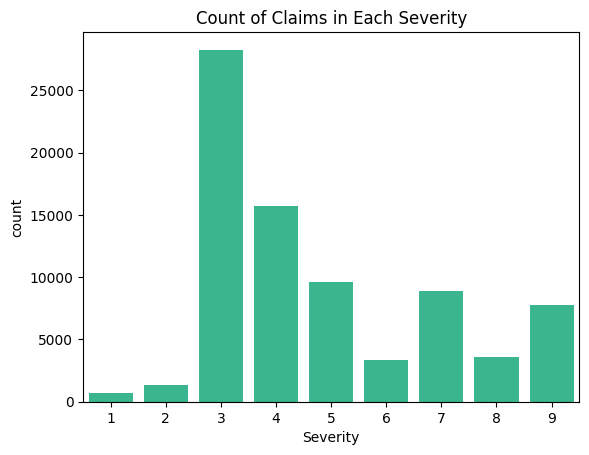

In [ ]:
### Variance of Population - Severity
var_pop = malpractice.Severity.var()
print(f"The variance of Severity found in the popuation is: {var_pop:.2f}.\n")


### Mean
mean_pop = malpractice.Severity.mean()
print(f"The mean Severity found in the popuation is: {mean_pop:.2f}\n")

counts_per_sev = malpractice.groupby("Severity").agg('count')
perc_tot_sev = [[counts_per_sev.Amount], [(100*counts_per_sev.Amount/counts_per_sev.Amount.sum()).round(2)]]
ax= sns.barplot(x='Severity', y = 'count', data = strat_stats_pop, color=("#26CA96"))
ax.set_title("Count of Claims in Each Severity")

The above chart shows the distribution of severity in the population. Severity 0 represents emotional trauma and severity 9 represents death.
The two severity levels with the most claims are 3 and 4 with around twenty-eight thousand and fifteen thousand claims respectively.


## 2. Severity & Amount


**Variance of Claim Amount in Each Severity**

The variance in each strat is
 Severity
1    2.165761e+09
2    2.067158e+09
3    9.815984e+09
4    1.566851e+10
5    3.315645e+10
6    7.200633e+10
7    7.636084e+10
8    7.454278e+10
9    4.619133e+10
Name: var, dtype: float64.


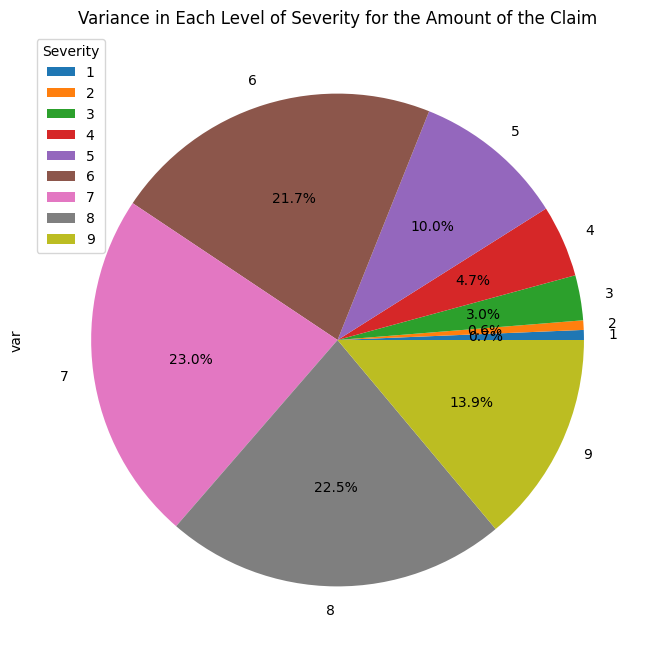

In [ ]:
### Variance of Each Severity
var_strat = strat_stats_pop["var"]
print(f"The variance in each strat is\n {var_strat}.")

# Visual (pie chart)
strat_stats_pop["var"]/strat_stats_pop["var"].sum()*100
plt.figure(figsize=(8,8))
strat_stats_pop["var"].plot.pie(y="var",autopct='%1.1f%%',)
plt.title("Variance in Each Level of Severity for the Amount of the Claim")
plt.legend(title="Severity",loc='upper left')

The variance of the amount of each claim varies between all severities. Severity 6, 7 and 8 show the most variance in claim amount, whereas in Severity 1, 2 and 3 there is much less.


**Distribution of Amount by Severity**

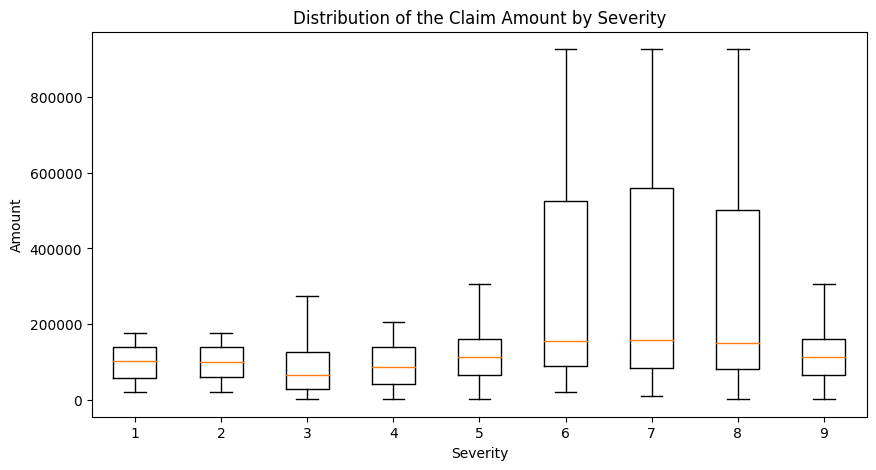

In [ ]:
strat = [malpractice.Amount[malpractice.Severity == Severity] for Severity, _ in grouped_pop.iterrows()]

plt.figure(figsize=(10,5))
plt.boxplot(strat, showfliers=False)
plt.ylabel("Amount")
plt.xlabel("Severity")
plt.title("Distribution of the Claim Amount by Severity")
plt.show()

The distribution of the claim amount is largest in severity levels six through eight and is also the highest. This means accidents with these levels of severity have the potential for the highest payout and also the widest possible range for the amount of the payout.

Interestingly, severity 9 which equates to death has a lower payout range than severity levels lower than it. This is likely because with death there is no future, so the financials related to loss of wages, therapy (mental and physical) and other bills inquired if the patient was still alive would not exist.


### Mean Claim Amount by Severity

The sample strat mean is 185545.56



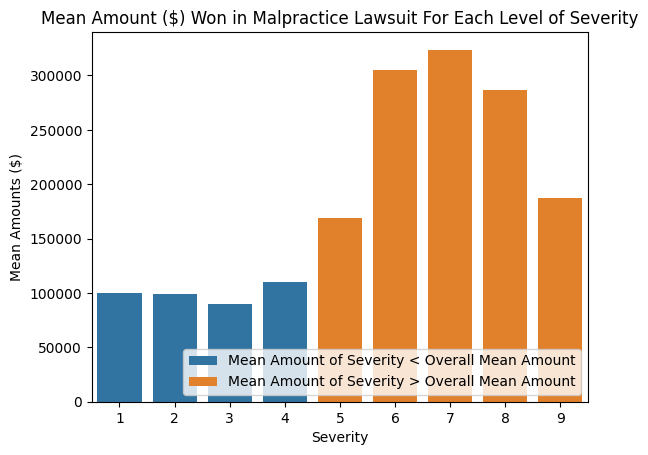

In [ ]:
### Mean
mean_strat = strat_stats_pop["mean"].mean()
print(f"The sample strat mean is {mean_strat:.2f}\n")
mean_pop = malpractice.Amount.mean()

# Visual (bar chart)
cols = ['Mean Amount of Severity < Overall Mean Amount' if x < mean_pop else 'Mean Amount of Severity > Overall Mean Amount' for x in strat_stats_pop["mean"]]
ax = sns.barplot(x='Severity', y = 'mean', data = strat_stats_pop,  hue=cols);
sns.move_legend(ax, "lower right")
plt.ylabel("Mean Amounts ($)");
plt.title("Mean Amount ($) Won in Malpractice Lawsuit For Each Level of Severity");
plt.show();


The above is a plot of the mean claim amounts for each severity. The colours represent whether the mean is above or below the mean overall claim amount.  Severity levels five through nine have mean claim amounts greater than the overall mean of claim amounts. Severity levels 1 through 4 have mean amounts that are less than the overall mean claim amount. The worse the severity of the case the more likely the plaintiff is to get more money. This makes sense, as the worse the outcome of the accident the more the client should be awarded to compensate for their damages.




# 3. Specialty and Claim Amount
**What are the differences in mean and variation of the claim amounts by different specialties?**


In [ ]:
# change group variables depending what you want to group
group_var="Specialty"

#Allows us to group by specialty and see counts, means, and variation within each specialty
grouped_pop = malpractice.groupby(group_var).agg(["count", "mean", "var"]).Amount
grouped_pop

<ipython-input-58-cf5bd5c44906>:5: FutureWarning: ['Insurance', 'Gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_pop = malpractice.groupby(group_var).agg(["count", "mean", "var"]).Amount


,count,mean,var
Specialty,,,
Anesthesiology,8732,60398.849634,3.047083e+09
Cardiology,2659,94159.338473,2.031424e+09
Dermatology,1384,354753.329480,8.501017e+10
Emergency Medicine,4676,145732.356929,4.194572e+10
Family Practice,11436,213266.389035,5.373606e+10
General Surgery,9412,132403.394496,1.914924e+10
Internal Medicine,5223,143943.532644,3.740291e+10
Neurology/Neurosurgery,4737,241276.952713,6.555946e+10
OBGYN,8876,219075.251352,4.833037e+10


**Insight:** Here we can see that there are a lot more *Family Practice* and *General Surgery* claims than other ones.

**Distribution of the Claim Amount by Specialty**

<ipython-input-59-40039dc66e15>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped_pop.index)


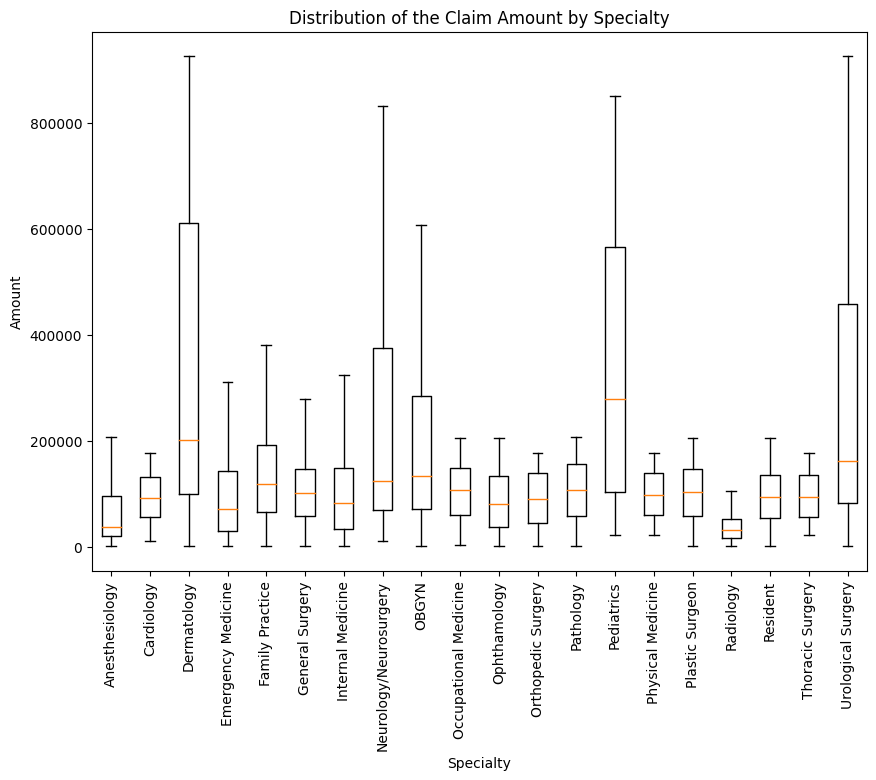

In [ ]:
strat = [malpractice.Amount[malpractice.Specialty == Specialty] for Specialty, _ in grouped_pop.iterrows()]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_xticklabels(grouped_pop.index)
plt.boxplot(strat, showfliers=False)
plt.ylabel("Amount")
plt.xlabel("Specialty")
plt.xticks(rotation=90)
plt.title("Distribution of the Claim Amount by Specialty")
plt.show()

**Insight:** Here we can see there is a much higher mean amount claimed for Neurology/Neurosurgery, Urological Surgery, Dermatology, and Pediatrics with much higher variability compared to the rest of the specialties. However, these specialties also had fewer claims overall compared to the other specialties.

**Variance in Each Specialty for the Amount of the Claim**

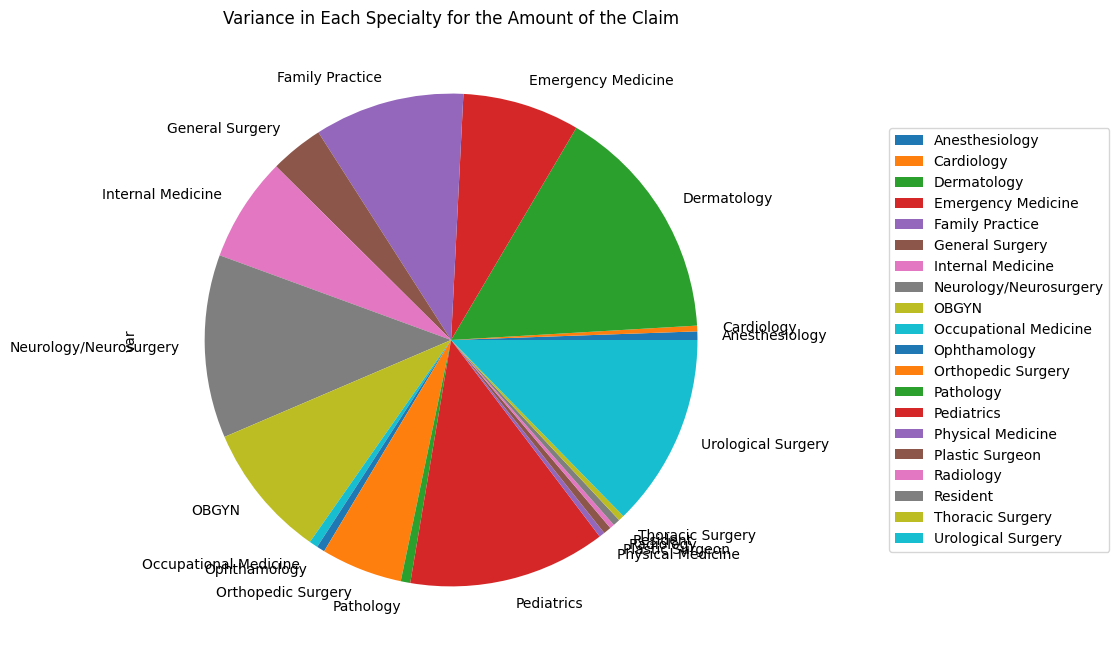

In [ ]:
# Visual (pie chart)
grouped_pop["var"]/grouped_pop["var"].sum()*100
plt.figure(figsize=(8,8))
grouped_pop["var"].plot.pie(y="var")
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.title("Variance in Each Specialty for the Amount of the Claim");


**Insight:** Here we wanted to visualize the variance as a percentage of amount per specialty. We can see that Neurology/Neurosurgery, Urological Surgery, Dermatology, and Pediatrics have the highest variance in the percentage of the amount, similar as seen in the box plot.

**Distributions of Malpractice Amounts ($) based on Specialty"**

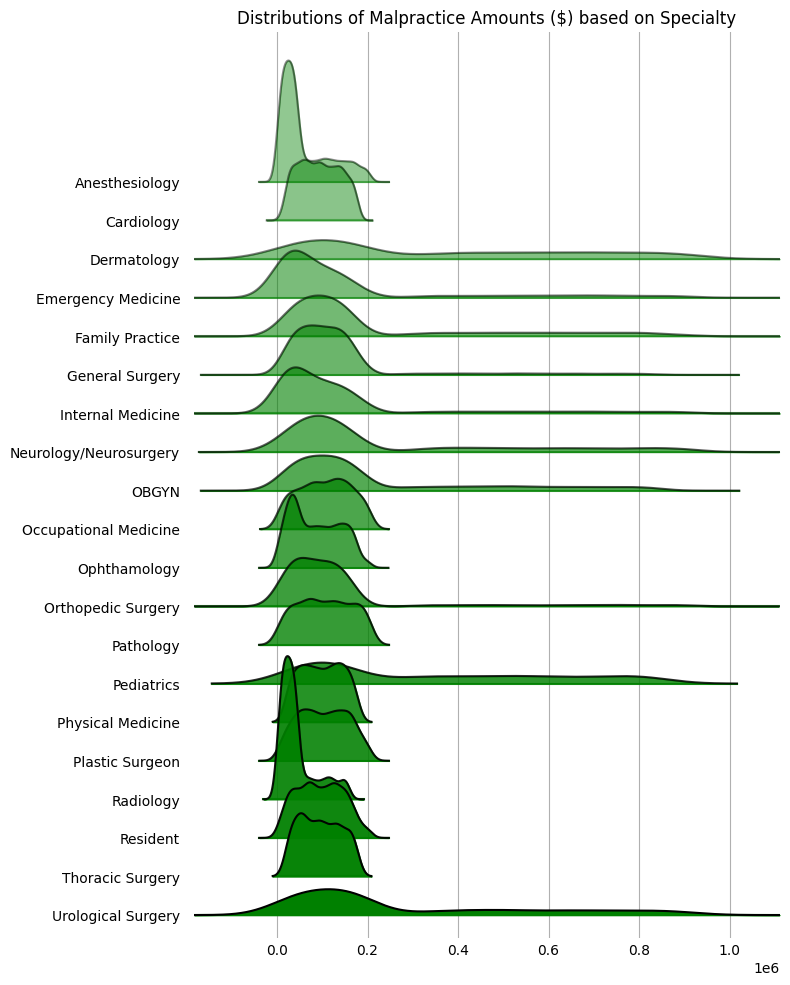

In [ ]:
joyplot(malpractice, by = 'Specialty', column = 'Amount', color = 'Green', fade = True, range_style='own', figsize = (8,10), title="Distributions of Malpractice Amounts ($) based on Specialty", overlap=2, grid='x')
plt.show()

**Insight:** Here we plotted the distribution of each of the specialties and amount. We can see that there are some distributions that are heavily skewed like Urology or Pediatrics. This is because of the large amount of claims made in these malpractice suits. The majority of claim amounts lie between 0-$300,000.

**Mean malpractice amounts ($) won in lawsuit shown by Specialty**

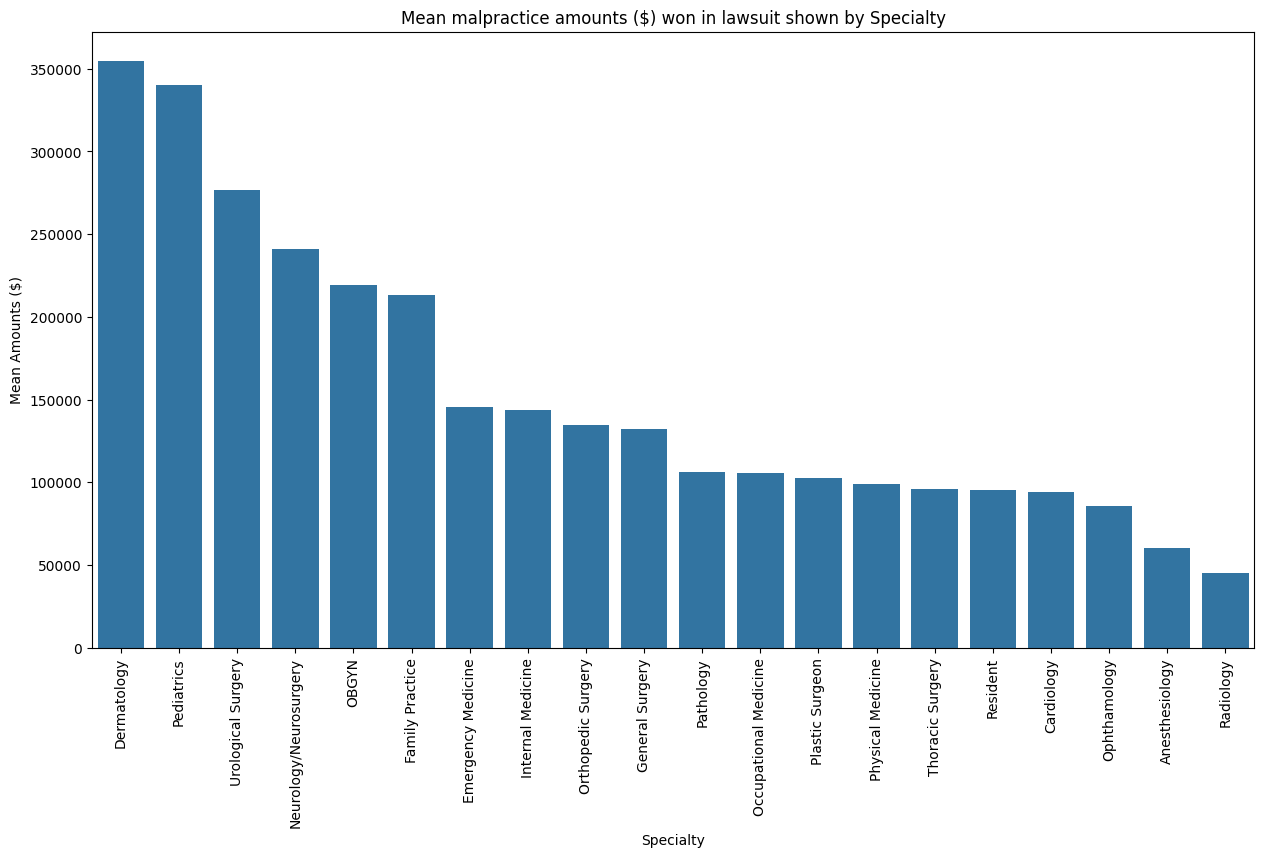

In [ ]:
plt.figure(figsize=(15,8))
malpractice_mean = pd.DataFrame(malpractice.groupby("Specialty").Amount.mean().sort_values(ascending=False))
ax = sns.barplot(x='Specialty', y = 'Amount', data = malpractice_mean)
plt.xticks(rotation=90);
plt.ylabel("Mean Amounts ($)")
plt.title("Mean malpractice amounts ($) won in lawsuit shown by Specialty")
plt.show()
# order = malpractice_mean.sort_values(ascending=False).Specialty

**Insight:** The mean claim amounts are plotted above and it can be seen that the highest claim payouts occurred in dermatology and pediatrics, and the lowest payouts in anesthesiology and radiology.


## 4. Correlation

In [ ]:
label_encoder = LabelEncoder()
label_encoder

df_corr = malpractice.copy(deep=True)

# Ordinal: the data can be categorized and ranked.
ordinal_columns = ['Severity','Age']
for column in ordinal_columns:
    df_corr[column] = label_encoder.fit_transform(df_corr[column])
# display(malpractice)

# Nominal: the data can only be categorized.
nominal_columns = ['Private Attorney','Marital Status','Specialty','Insurance','Gender']
df_corr = pd.get_dummies(df_corr, columns=nominal_columns, drop_first=True)
# display(malpractice)

<Axes: >

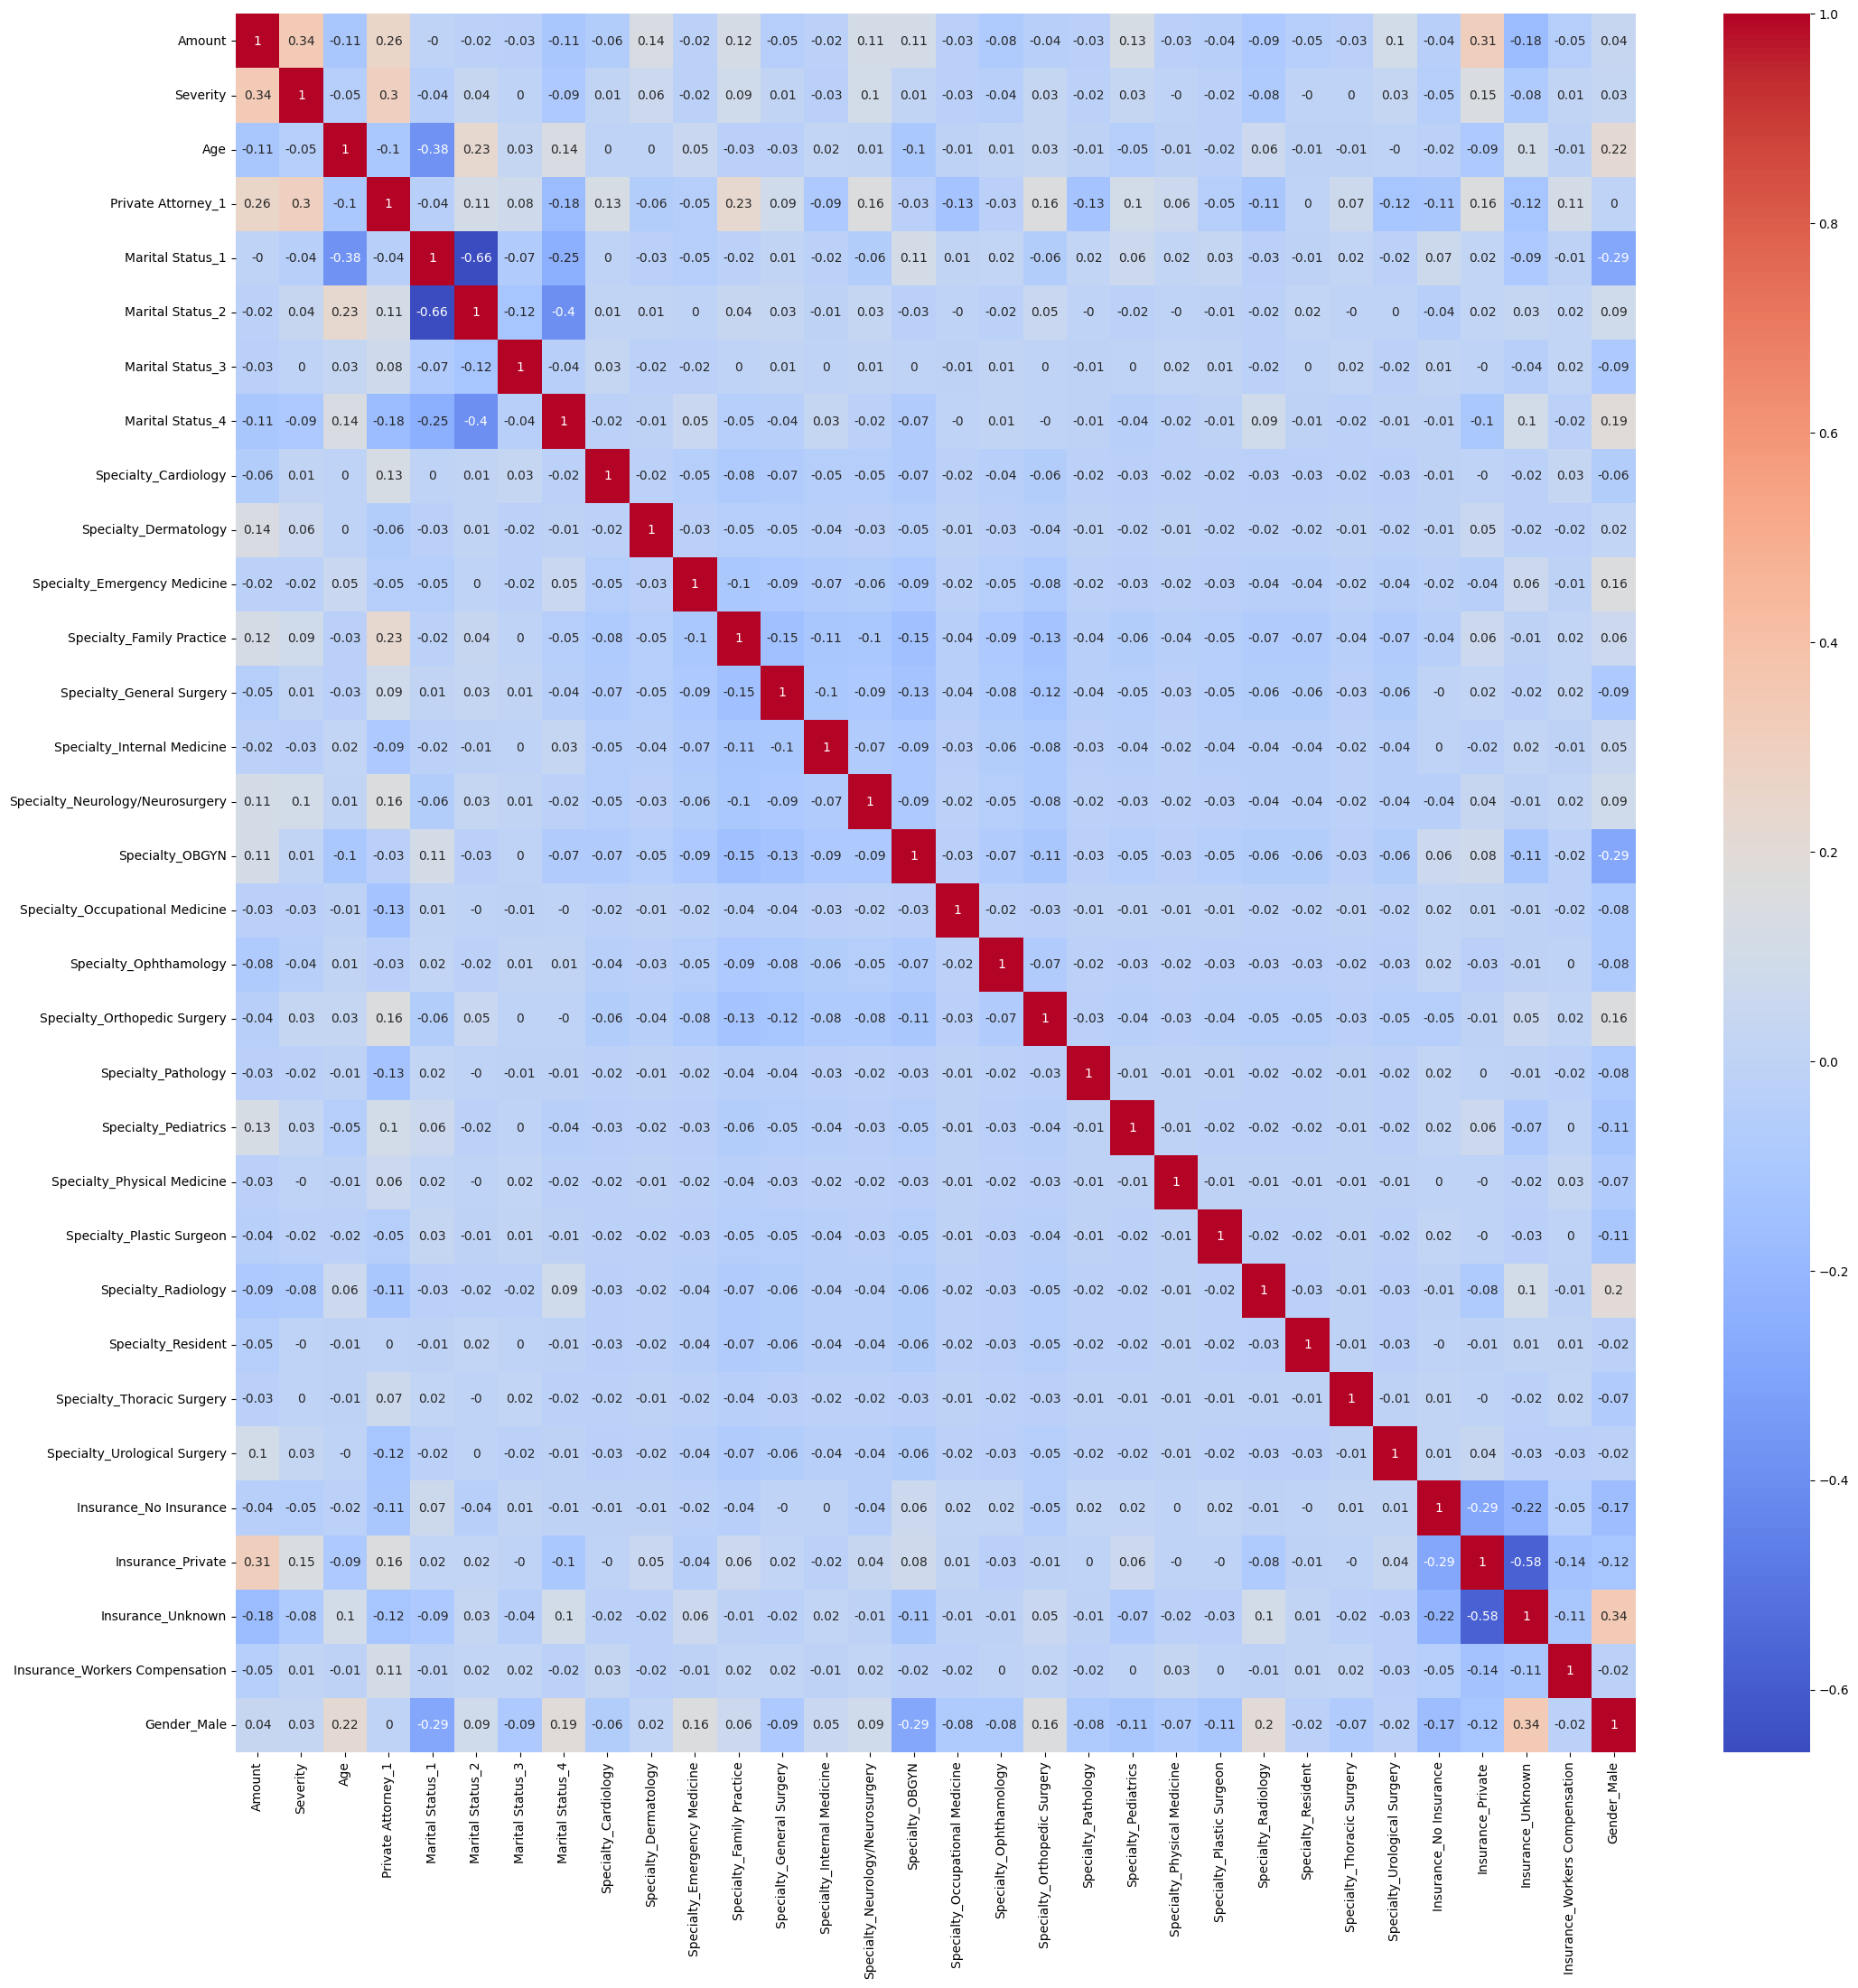

In [ ]:
correlation = df_corr.corr().round(2)
plt.figure(figsize = (25,25))
# sns.heatmap(correlation, annot = True, cmap = 'vlag')
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

The above shows the correlations for all the variables in the dataset. There are no correlations that are greater than 0.5, except correlations between values of the same feature, for example, Marital Status 1 and 2, which are bother listed in the feature "Marital", the same can be seen for Insurance_Uknown and Insurance_Private within the feature "Insurance".

## Correlations with Claim Amount

<Axes: >

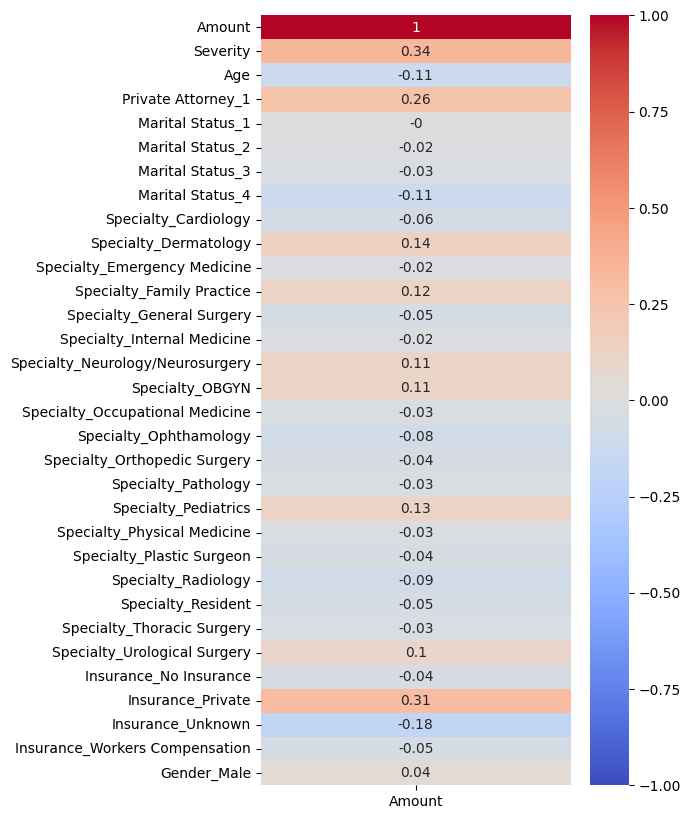

In [ ]:
corr_amount = pd.DataFrame(correlation["Amount"])
plt.figure(figsize = (5,10))
sns.heatmap(corr_amount, vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

Severity and Private insurance have the largest correlation values for the amount of claim payouts. All correlation values for the claim amount are shown to be insignificant.




---



# STATISTICAL ANALYSIS

1. Hypothesis Testing - Kruskal-Wallis




> *   Mean Claim Amount for Severity
> *   Mean Claim Amount for Specialty

2. Logistic Regression

> *   Predicting whether a Private Attorney was used (Yes or No)
> *   Predicting Age of Plaintiff (Senior and Youth)


3. Linear Regression - Age of Plaintiff




## 1. Hypothesis Testing - Kruskal-Wallis
We wanted to further verify there were actually statistical differences in the means between specialties.


We decided to do the Kruskal-Wallis H-test for independent samples.

"The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different."[4]

### Kruskal-Wallis for Severity

**Is there a difference in claim amount by severity?**


Hypothesis:
$$
H_0: \text{All severities have the same mean claim amount.} \\
H_A: \text{At least one of the severities has a different mean claim amount.}
$$

In [ ]:
one = malpractice[malpractice.Severity == 1].Amount
two = malpractice[malpractice.Severity == 2].Amount
three = malpractice[malpractice.Severity == 3].Amount
four = malpractice[malpractice.Severity == 4].Amount
five = malpractice[malpractice.Severity == 5].Amount
six = malpractice[malpractice.Severity == 6].Amount
seven = malpractice[malpractice.Severity == 7].Amount
eight = malpractice[malpractice.Severity == 8].Amount
nine = malpractice[malpractice.Severity == 9].Amount

stats.kruskal(one,two ,three,four,five ,six ,seven,eight,nine)

KruskalResult(statistic=10635.97201031183, pvalue=0.0)

With an $\alpha$=0.05, we can reject the null hypothesis that all severities have the same mean claim amount. Using the Kruskal-Wallis Test, the p-value was found to be close to 0.

### Kruskal-Wallis for Specialty

**Is there a difference in claim amount by specialty?**

Hypothesis:

$$
H_0: \text{All specialties have the same mean claim amount.} \\
H_A: \text{At least one of the specialties has a different mean claim amount.}
$$


In [ ]:
derma = malpractice[malpractice.Specialty == 'Dermatology'].Amount
ped = malpractice[malpractice.Specialty == 'Pediatrics'].Amount
us = malpractice[malpractice.Specialty == 'Urological Surgery'].Amount
neur = malpractice[malpractice.Specialty == 'Neurology/Neurosurgery'].Amount
fp = malpractice[malpractice.Specialty == 'Family Practice'].Amount
obgyn = malpractice[malpractice.Specialty == 'OBGYN'].Amount
card = malpractice[malpractice.Specialty == 'Cardiology'].Amount
im = malpractice[malpractice.Specialty == 'Internal Medicine'].Amount
anes = malpractice[malpractice.Specialty == 'Anesthesiology'].Amount
em =malpractice[malpractice.Specialty == 'Emergency Medicine'].Amount
opth=malpractice[malpractice.Specialty == 'Ophthamology'].Amount
ortho = malpractice[malpractice.Specialty == 'Orthopedic Surgery'].Amount
om = malpractice[malpractice.Specialty == 'Occupational Medicine'].Amount
resi = malpractice[malpractice.Specialty == 'Resident'].Amount
thor = malpractice[malpractice.Specialty == 'Thoracic Surgery'].Amount
gs = malpractice[malpractice.Specialty == 'General Surgery'].Amount
radio = malpractice[malpractice.Specialty == 'Radiology'].Amount
patho = malpractice[malpractice.Specialty == 'Pathology'].Amount
pm = malpractice[malpractice.Specialty == 'Physical Medicine'].Amount
plast = malpractice[malpractice.Specialty == 'Plastic Surgeon'].Amount

In [ ]:
stats.kruskal(derma, ped, us, neur, fp, obgyn, card, im, anes, em, opth, ortho, om, resi, thor, gs, radio, patho, pm, plast)

KruskalResult(statistic=11837.54146362006, pvalue=0.0)

P-value is 0 (<$\alpha$=0.05), this means we must reject the null hypothesis and at least one of the specialties has a different mean claim amount.

## 2. Logistic Regression

### Analysis of claim amount with a private attorney.

**Is there an advantage in the claim of having a private attorney versus not?**


Hypothesis:

$$H_0: Amount_{PrivateAttorney} == Amount_{NoPrivateAttorney}$$
$$H_a: Amount_{PrivateAttorney} > Amount_{NoPrivateAttorney}$$

Splitting the dataframe in 2 dataframes: Private Attorney and No Private Attorney.

Explore these dataframes by plotting histograms with density curves and violin plots

**Distribution of Claim Amount by Private Attorney**

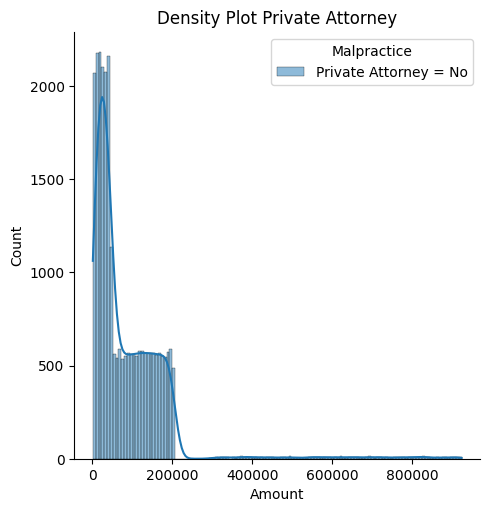

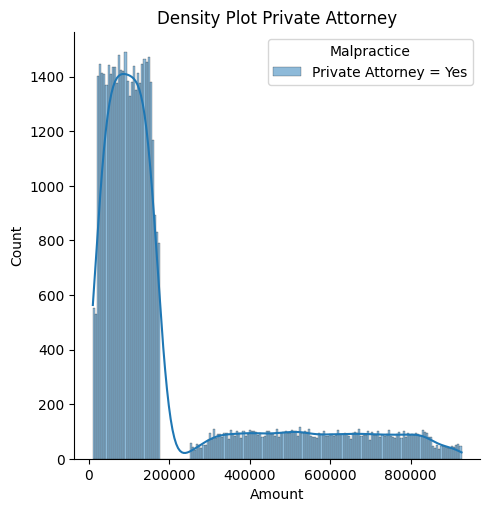

In [ ]:
malpractice['Private Attorney'] = malpractice['Private Attorney'].astype(bool)

privateNo = malpractice[malpractice['Private Attorney'] == 0]
privateYes =  malpractice[malpractice['Private Attorney'] == 1]

sns.displot(privateNo['Amount'], kde = True, kde_kws = {}, label = 'Private Attorney = No')
plt.legend(prop={'size': 10}, title = 'Malpractice')
plt.title('Density Plot Private Attorney')

sns.displot(privateYes['Amount'], kde = True, kde_kws = {}, label = 'Private Attorney = Yes')
plt.legend(prop={'size': 10}, title = 'Malpractice')
plt.title('Density Plot Private Attorney')

plt.show()

The density plot for the amounts when  Private Attorney == No is skewed to the right.

The density plot for Private Attorney == Yes is heavyly skewed to the right dispaying an unusual shape with a gap between 190000s and 250000s.



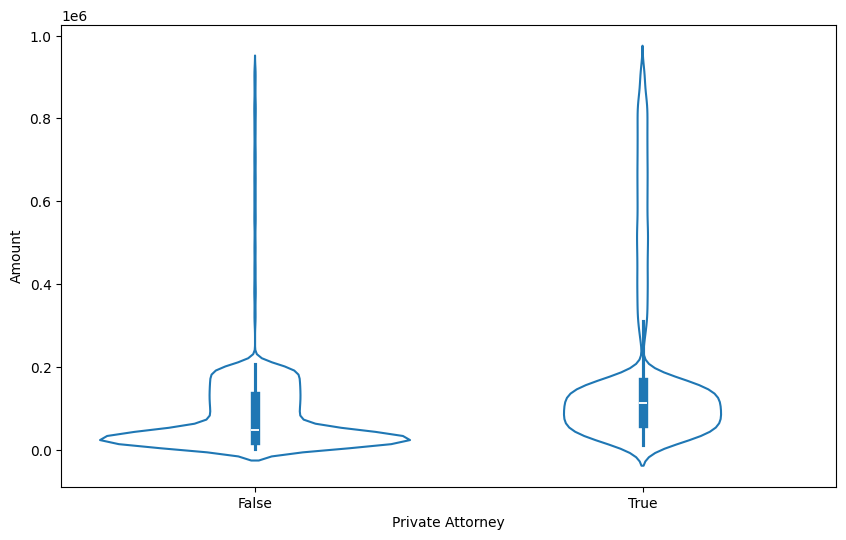

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=malpractice, x='Private Attorney', y=malpractice['Amount'], fill=False)
plt.show()

Violin plots showing a higher median for private attorney and the distribution unusulal distribution with 2 clear groups, 0 to 200000s and 250000s to 900000s.

In these violin plots we can see how the median for Private Attorney is higher than No Private Attorney. We can also see that Private attorney has more claim with bigger amounts paid out than No Private attourney,

**Statistics of the Claim Amounts with and without a Private Attorney**


In [ ]:
yesStats = privateYes['Amount'].describe()
noStats = privateNo['Amount'].describe()
attorneyStatsData = {'Private':yesStats, 'No Private':noStats}
attorneyStats = pd.concat(attorneyStatsData, axis=1)
attorneyStats

,Private,No Private
count,52349.000000,26861.000000
mean,193717.998185,86869.740516
std,216193.544094,106594.316916
min,10505.000000,1576.000000
25%,65259.000000,23832.000000
50%,113823.000000,46444.000000
75%,163301.000000,130183.000000
max,926411.000000,924229.000000


**Logistic Regression to Determine Whether a Private Attorney was Used**

In [ ]:
from sklearn.linear_model import LogisticRegression
['Private Attorney'] = malpractice['Private Attorney'].astype(bool)
x = malpractice.Amount.values
y = 1 * (malpractice['Private Attorney'] == True)

model = LogisticRegression()
model.fit(x.reshape(-1, 1), y)

LogisticRegression()

In [ ]:
a0 = model.intercept_.item()
a1 = model.coef_.item()
print(f" model.coef_.item() = { model.coef_.item()}, model.intercept_.item() = {model.intercept_.item()}")

 model.coef_.item() = 5.390903657551338e-06, model.intercept_.item() = 1.0004246075154475e-11


In [ ]:
yhat = model.predict(x.reshape(-1, 1))
phat = model.predict_proba(x.reshape(-1, 1))

In [ ]:
def s(x):
  return np.exp(x) / (1 + np.exp(x))

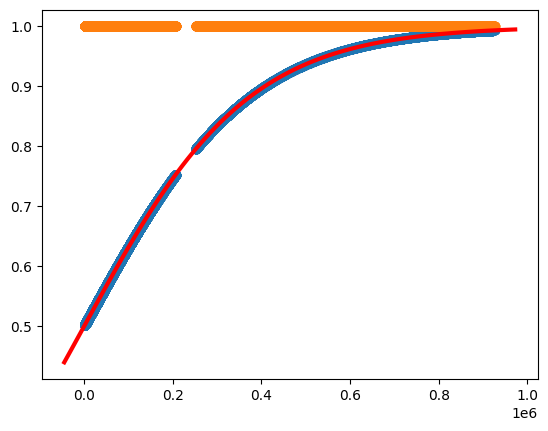

In [ ]:
assert np.allclose(yhat, phat[:, 1] > 0.5)

plt.scatter(x, phat[:, 1])
plt.scatter(x, yhat)

xmin, xmax = plt.xlim()
t = np.linspace(xmin, xmax, 100)
plt.plot(t, s(a0 + (a1 * t)), lw=3, color = 'red');

Logistic Regression graph not displaying the usual S shaped curve

In [ ]:
print(f"The accuracy of the Logistic Analysis model is: {np.mean(y == yhat):.4f}")

The accuracy of the Logistic Analysis model is: 0.6609


As we can see in the graph above, the logistic regression analysis didn't plot the S shape we were expecting. With Dr. Greenberg's help, we realized that the logistic regression is guessing 1 every time, therefore the accuracy is the same as the proportion of layer-yes in the dataset. As a result, this dataset is not good for logistic regression.

This is also supported by Ranganathan et al who stated *"Regression models assume that the relationship between the predictor variables and the dependent variable is uniform, i.e., follows a particular direction – this may be positive or negative, linear or nonlinear but is constant over the entire range of values." [5]

**Insight:** The dataset is not good for Logistic Regression Analysis

In [ ]:
#Dr. Greenberg's code to find the threshold where the amount shifts
malpractice.Amount[malpractice["Private Attorney"] == 1].mean(), malpractice.Amount[malpractice["Private Attorney"] == 1].std()

(193717.99818525664, 216193.54409438855)

In [ ]:
malpractice.Amount[malpractice["Private Attorney"] == 0].mean(), malpractice.Amount[malpractice["Private Attorney"] == 0].std()

(86869.74051598973, 106594.31691578808)

In [ ]:
from sklearn.model_selection import train_test_split
df_tr, df_te = train_test_split(malpractice, test_size=0.2)

45000


Text(0.5, 0, 'threshold')

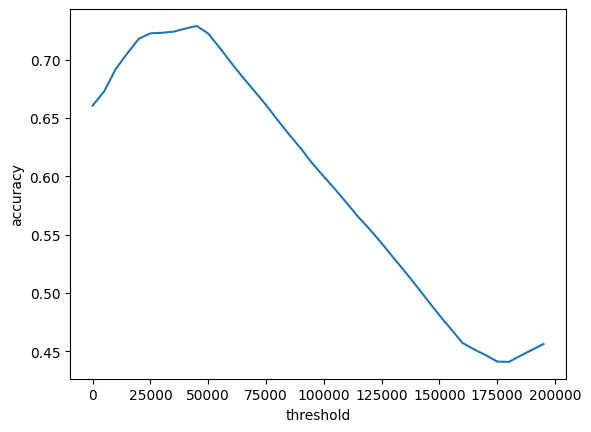

In [ ]:
amounts = np.arange(0, 200000, 5000)
accs = []
for amount in amounts:
  yhat = 1*(df_tr["Amount"] > amount)
  accs.append(np.mean(yhat == df_tr["Private Attorney"]))

i = np.argmax(accs)
print(amounts[i])

plt.plot(amounts, accs)
plt.ylabel("accuracy")
plt.xlabel("threshold")

Dr Greenberg suggested using this threshold to split the data frame or use a simpler method like determining the difference in means. I proceeded with determining the difference in means by bootstrapping the means for both Private Attorney = True and Private Attorney = False followed by t-test.

**Distribution of Bootstrap Means of Claim Amount With and Without Private Attorney**

Bootstrapping the mean for both:
*   private Attorney = True into mean_yes
*   Private Attorney = False into mean_no



Plotting histograms for the bootstraps

In [ ]:
rng = np.random.default_rng()
n_trials = 10000
mean_yes = np.zeros(n_trials)
for i in range(n_trials):
  data = privateYes.sample(n=5000, random_state = rng)
  mean_yes[i] = data['Amount'].mean()

mean_no = np.zeros(n_trials)
for i in range(n_trials):
  data = privateNo.sample(n=1000, random_state = rng)
  mean_no[i] = data['Amount'].mean()



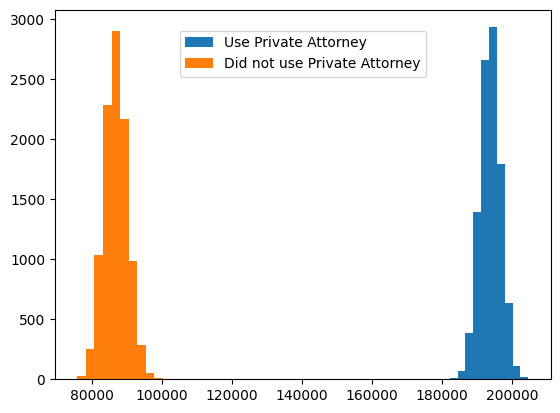

In [ ]:
plt.hist(mean_yes, label='Use Private Attorney')
plt.hist(mean_no, label='Did not use Private Attorney')
plt.legend(bbox_to_anchor=(0.5, 0.8))
plt.show()

The distribution of the mean_yes and mean_no is now normal. Proceed to apply t test

In [ ]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(mean_yes, mean_no)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:e}")

t-test: statistic=2439.9768, p-value=0.000000e+00


**Insight:** We obtain a t-test statistic = 2420.3748 with a corresponding p-value of 0.00 which at a significance value of $\alpha = 0.05$ gives enough evidence to conclude that there is a difference in the amount paid when using a private attorney; this amount is significantly greater.

## Analysis of claim amount with Age (Senior and non-senor citizen)

**Which age category, senior or non-senior citizen is associated with insurance malpractice?**


Hypothesis:

$$H_0: Amount_{SeniorCitizen} == Amount_{NonSeniorCitizen}$$
$$H_a: Amount_{NonSeniorCitizen} > Amount_{SeniorCitizen}$$


In [ ]:
malpractice['Senior_Citizen'] = malpractice['Age'].apply(lambda x: 'Yes' if x >= 60 else 'No')
Df2 = malpractice.copy()
print(Df2.head())

   Amount  Severity  Age  Private Attorney  Marital Status        Specialty  \
0   57041         7   62                 1               2  Family Practice   
1  324976         6   38                 1               2            OBGYN   
2  135383         4   34                 1               2       Cardiology   
3  829742         7   42                 1               1       Pediatrics   
4  197675         3   60                 0               2            OBGYN   

           Insurance  Gender Senior_Citizen  
0            Private    Male            Yes  
1       No Insurance  Female             No  
2            Unknown    Male             No  
3       No Insurance  Female             No  
4  Medicare/Medicaid  Female            Yes  


In [ ]:
mean_amount_by_age_category = Df2.groupby('Senior_Citizen')['Amount'].mean()


**T Test to investigate the significant association between age category**

T-Statistic: -105.85283475020988
P-Value: 0.0
Reject the null hypothesis: There is a significant difference in mean 'Amount' for different age categories.


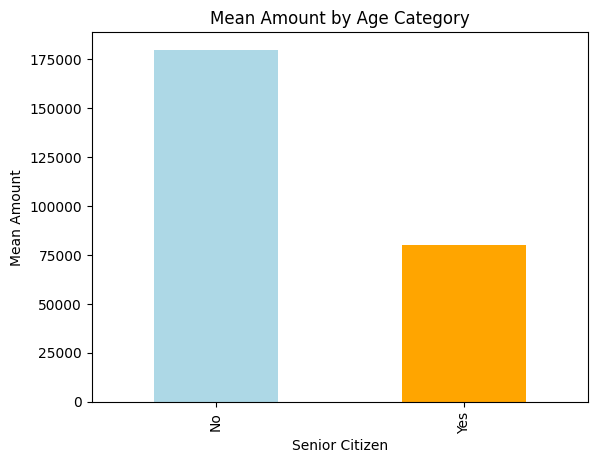

In [ ]:
from scipy.stats import ttest_ind

amount_senior = Df2[Df2['Senior_Citizen'] == 'Yes']['Amount']
amount_non_senior = Df2[Df2['Senior_Citizen'] == 'No']['Amount']

t_statistic, p_value = ttest_ind(amount_senior, amount_non_senior, equal_var=False)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean 'Amount' for different age categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean 'Amount' for different age categories.")

mean_amount_by_age_category.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Mean Amount by Age Category')
plt.xlabel('Senior Citizen')
plt.ylabel('Mean Amount')
plt.show()



The T-test yielded a significant T-statistic of -105.85 alongside a small p-value, providing substantial evidence against the null hypothesis. The negative T-statistic implies that the mean "Amount" for senior citizens is lower compared to non-senior citizens. Furthermore, the histogram vividly illustrates the pronounced impact of non-senior citizens on insurance malpractice.

**Logistic Regression  to predict the probability of "Amount" falling into specifc Age categories**

In [ ]:
x = Df2.Amount.values
y = 1*(Df2.Senior_Citizen == "Yes")
print(list(zip(x[:5], y[:5])))

[(57041, 1), (324976, 0), (135383, 0), (829742, 0), (197675, 1)]


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x.reshape(-1,1),y)
yhat = model.predict(x.reshape(-1,1))
(y == yhat).mean()

0.7766696124226738

In [ ]:
a0 = model.intercept_.item()
a1 = model.coef_.item()
print(f"model.coef_.item() = {model.coef_.item()}, model.intercept_.item() = {model.intercept_.item()}")
yhat = model.predict(x.reshape(-1, 1))
phat = model.predict_proba(x.reshape(-1, 1))

assert np.allclose(yhat, phat[:, 1] > 0.5)

model.coef_.item() = -1.0460639136173355e-05, model.intercept_.item() = -1.7831417635756346e-10


<Axes: xlabel='Amount', ylabel='Senior_Citizen'>

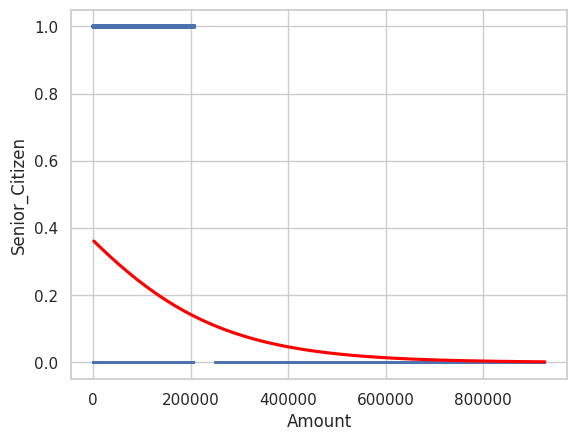

In [ ]:
sns.set(style="whitegrid")
sns.regplot(x=Df2.Amount, y=(Df2.Senior_Citizen == "Yes"), logistic=True, scatter_kws={'s': 1 + 5*(malpractice.Senior_Citizen == "Yes")}, line_kws={'color': 'red'})


1. The logistic regression model has been trained and evaluated, showing an accuracy of approximately 0.777.
2. The coefficients of the logistic regression model are approximately a0 = -1.783e-10 (intercept) and a1 = -1.046e-05 (coefficient for 'Amount').


Despite achieving a model accuracy of 77%, the visual representation of the sigmoid function in the graph indicates that it may not be a suitable fit for the data. The discrepancy between the accuracy metric and the sigmoid function suggests that while the model performs reasonably well in terms of overall correctness, it might struggle with capturing the underlying patterns or relationships in the data.

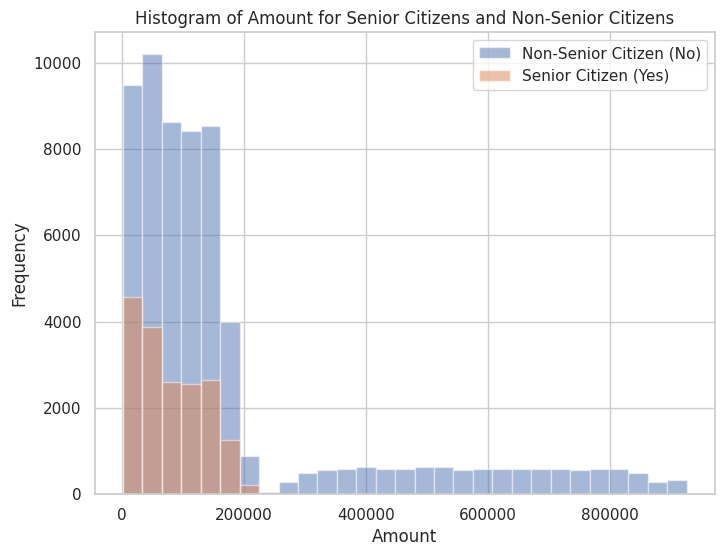

In [ ]:
import numpy as np

senior_citizen_data = Df2[Df2['Senior_Citizen'] == 'Yes']['Amount']
non_senior_citizen_data = Df2[Df2['Senior_Citizen'] == 'No']['Amount']

# Determine the bin edges based on the range of both datasets
bin_edges = np.linspace(min(min(senior_citizen_data), min(non_senior_citizen_data)),
                        max(max(senior_citizen_data), max(non_senior_citizen_data)),
                        30)  # Adjust the number of bins as needed

plt.figure(figsize=(8, 6))

# Plot histograms with the same bin edges
plt.hist(non_senior_citizen_data, bins=bin_edges, alpha=0.5, label='Non-Senior Citizen (No)')
plt.hist(senior_citizen_data, bins=bin_edges, alpha=0.5, label='Senior Citizen (Yes)')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount for Senior Citizens and Non-Senior Citizens')
plt.legend()
plt.show()

**Reason** - Logistic regression assumes a linear relationship between the predictor variables and the log-odds of the binary outcome.

However, it may encounter challenges when the data points are heavily overlapped or not linearly separable. In the context of the provided histogram, it likely reveals an overlap of data points between senior and non-senior citizens, making it difficult for the logistic regression model to establish a clear decision boundary.

## 3. Linear Regression

**Prediction of the probability of "Amount" falling into specifc Age categories**

Training R-squared: 0.046
Testing R-squared: 0.047


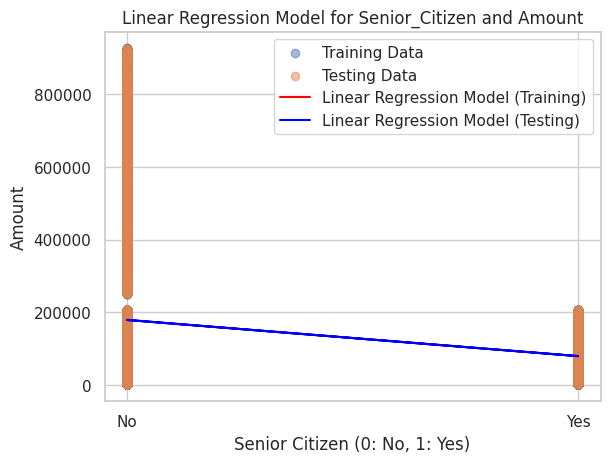

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = Df2[['Senior_Citizen']]
y = Df2['Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('senior_citizen', OneHotEncoder(drop='first'), ['Senior_Citizen'])
    ],
    remainder='passthrough'
)

model = LinearRegression()

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

X_train_df = pd.DataFrame(X_train, columns=['Senior_Citizen'])
X_test_df = pd.DataFrame(X_test, columns=['Senior_Citizen'])

pipeline.fit(X_train_df, y_train)  # model

train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Training R-squared: {train_score:.3f}')
print(f'Testing R-squared: {test_score:.3f}')

predictions_train = pipeline.predict(X_train_df)
predictions_test = pipeline.predict(X_test_df)

plt.scatter(X_train_df['Senior_Citizen'], y_train, alpha=0.5, label='Training Data')
plt.scatter(X_test_df['Senior_Citizen'], y_test, alpha=0.5, label='Testing Data')

plt.plot(X_train_df['Senior_Citizen'], predictions_train, color='red', label='Linear Regression Model (Training)')

plt.plot(X_test_df['Senior_Citizen'], predictions_test, color='blue', label='Linear Regression Model (Testing)')

plt.xlabel('Senior Citizen (0: No, 1: Yes)')
plt.ylabel('Amount')
plt.title('Linear Regression Model for Senior_Citizen and Amount')
plt.legend()
plt.show()

The R-squared values of 0.047 for the testing data and 0.046 for the training data suggest that the linear model, applied to the "Amount" variable, does not explain a substantial proportion of the variance in the data. In other words, only about 4.6-4.7% of the variability in the "Amount" variable can be accounted for by the linear model.

This indicates that the linear relationship between the predictor variable(s) and the "Amount" variable may not be strong or that other factors not considered in the model contribute significantly to the variance. Additionally, feature engineering or transformation techniques may be explored to enhance the model's ability to capture non-linearities in the "Amount" variable.

# CONCLUSION

Looking into the severity of claims it was found the distribution of the number of claims differed between the different severities.

Furthermore, looking into the amount of the claim per severity, it was found that the variance and mean were different among the severity's. Severity 6, 7 and 8 had the most variance in claim amount and also the largest potential payout for a claim.

Severity levels 5 through 9 have mean claim amounts greater than the overall mean of claim amounts and the remaining Severities had mean claim amounts less than the overall mean. This follows the assumption that the worse the severity of the case the more likely the plaintiff is to get more money.

The only correlations greater than 0.5, were between categories of the same feature.
Severity and Private insurance had the highest correlation to claim amount with values of 0.34 and 0.31 respectively. However, all correlation values with the claim amount were insignificant.

When we look into the specialties of the different claim departments, we can see that the distributions vary for all the different specialties. We found that most claims were for specialty Family Practice and General Surgery. We can see there is a much higher mean amount claimed for Neurology/Neurosurgery, Urological Surgery, Dermatology, and Pediatrics with much higher variability compared to the rest of the specialties.

The highest claim payouts occurred in dermatology and pediatrics when we looked at the mean claim amounts. The statistical hypothesis we looked at was seeing if there was a difference in mean amounts for each of the different specialties, and after our statistical testing we can conclude there is indeed a difference in the mean amount won by each specialty.

Logistic regression is not an appropriate method for this dataset. This is supported by the data exploration allows to determine that the data distribution for Private attorney is showed to the right for both Private Attorney == Yes and Private Attorney == No. In addition the distribution of the data for Private Attorney == Yes is not continuous. The results of the logistic regression method did not make sense.

The difference in the claim amounts between using a Private Attorney and not using a Private Attorney is statistically significant as corroborated for the t-test (P-value = 0.00 at $\alpha = 0.05$) applied to the means of both cases.

For the Age specific analysis, hypothesis testing using T test was carried out and found that non – senior citizen is impacting more on the claim amount for insurance malpractice.

To predict the probability of claim amount falling into specific category, logistic regression with 77% accuracy and linear regression with testing data 0.047 r square and training data 0.046 r square were carried out. But as the data points are heavily overlapped, the sigmoid function doesn’t look appropriate, both the models did not work. And planned to work in the future with non linear regression.


# REFERENCES

[1] “malpractice,” Merriam-Webster Dictionary. Feb. 12, 2024. [Online]. Available: https://www.merriam-webster.com/dictionary/malpractice

[2] “CMPA - 2022 CMPA Annual Report,” CMPA. https://www.cmpa-acpm.ca/en/about/annual-report/2022-cmpa-annual-report

[3] “Medical Malpractice - Insurance Dataset,” Kaggle, Sep. 25, 2023. https://www.kaggle.com/datasets/gabrielsantello/medical-malpractice-insurance-dataset

[4] “Scipy.Stats.Kruskal — SciPY v1.12.0 Manual.” https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

[5] Ranganathan, P., Pramesh, C. S., & Aggarwal, R. (2017). Common pitfalls in statistical analysis: Logistic regression. Perspectives in clinical research, 8(3), 148–151. https://doi.org/10.4103/picr.PICR_87_17